In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('D:\Data_Science\March\healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df=df.drop('id',axis=1)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
cat_var=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']    

In [9]:
def ct_plot(variable):
    var=df[variable]
    varvalue=var.value_counts()
    plt.figure(figsize=(10,8))
    plt.bar(varvalue.index,varvalue)
    plt.xticks(varvalue.index,varvalue.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varvalue))

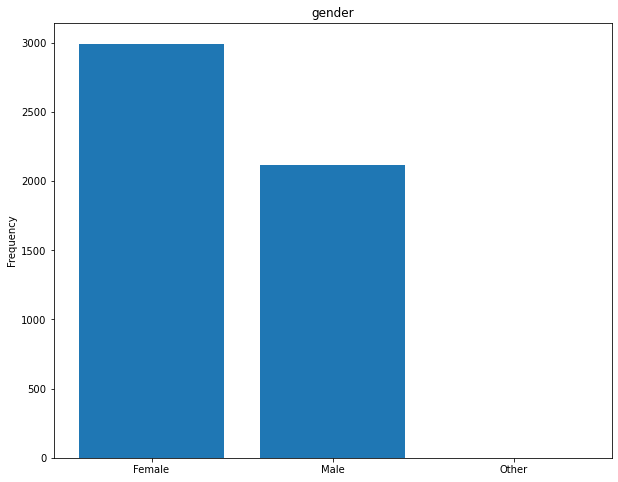

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


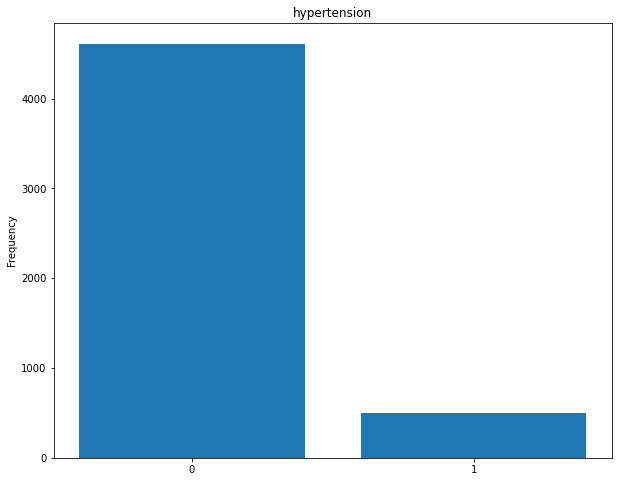

hypertension:
0    4612
1     498
Name: hypertension, dtype: int64


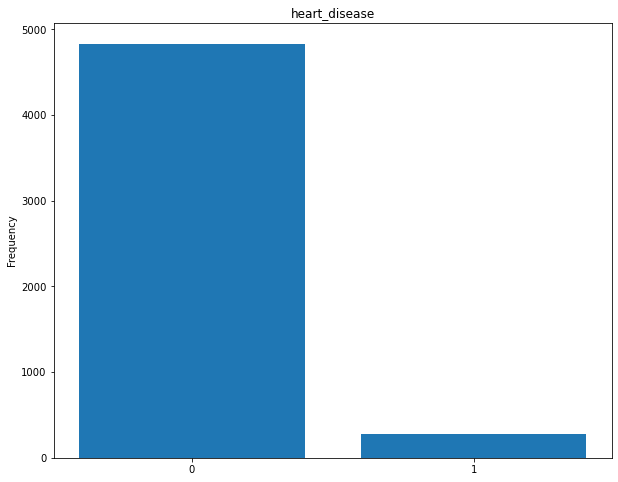

heart_disease:
0    4834
1     276
Name: heart_disease, dtype: int64


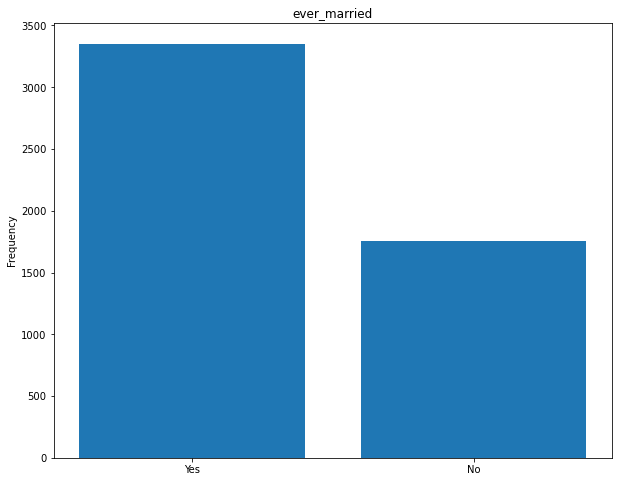

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64


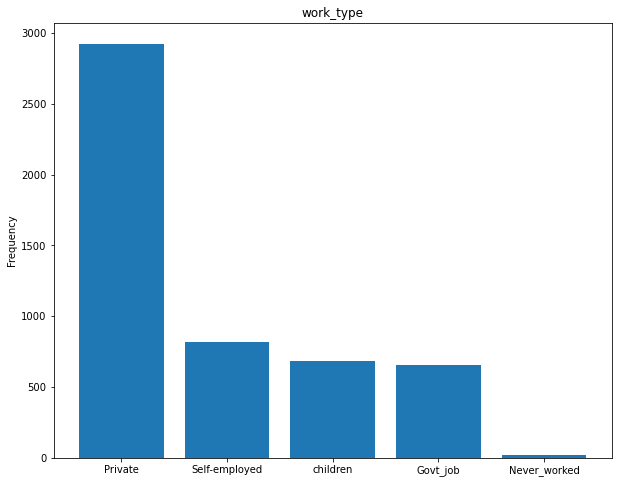

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


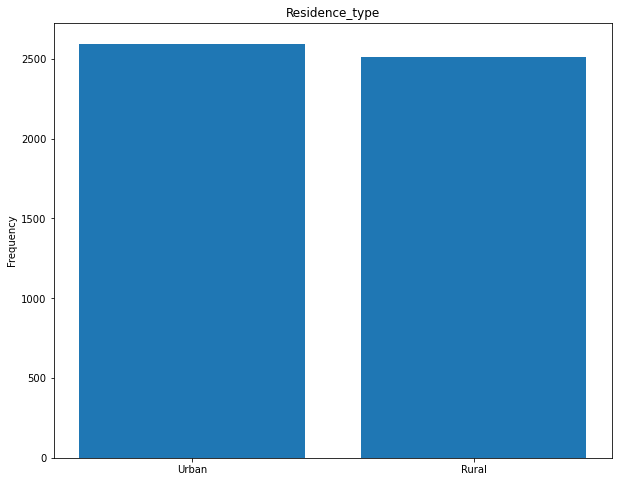

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


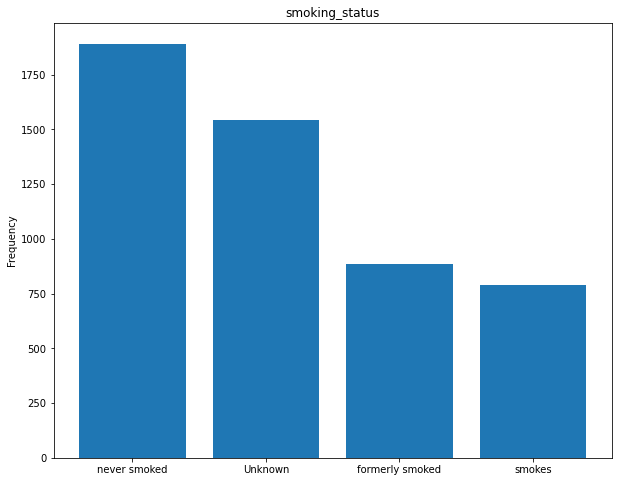

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [10]:
for c in cat_var:
    ct_plot(c)

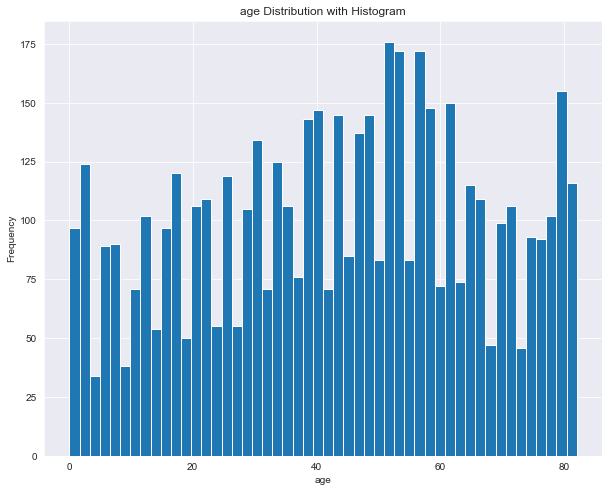

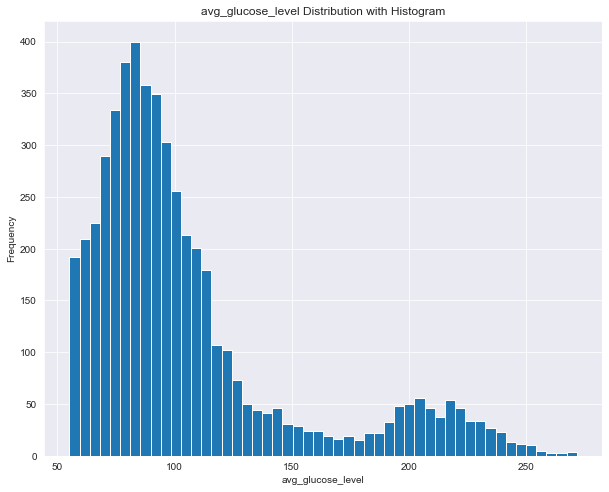

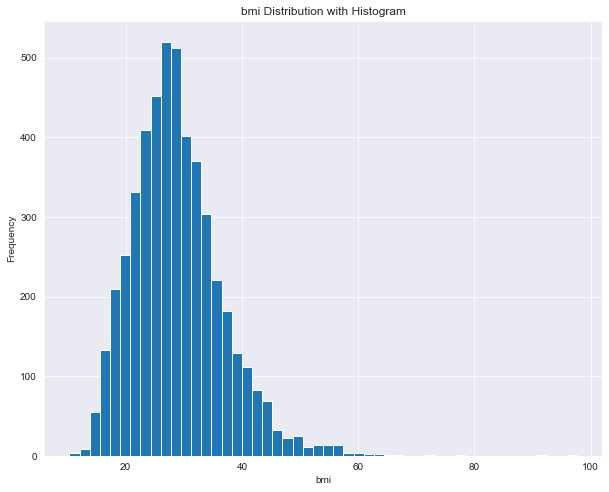

In [11]:
sns.set_style('darkgrid')
num_var=['age','avg_glucose_level','bmi']
def hist_plot(variable):
    plt.figure(figsize=(10,8))
    plt.hist(df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()
for n in num_var:
    hist_plot(n)

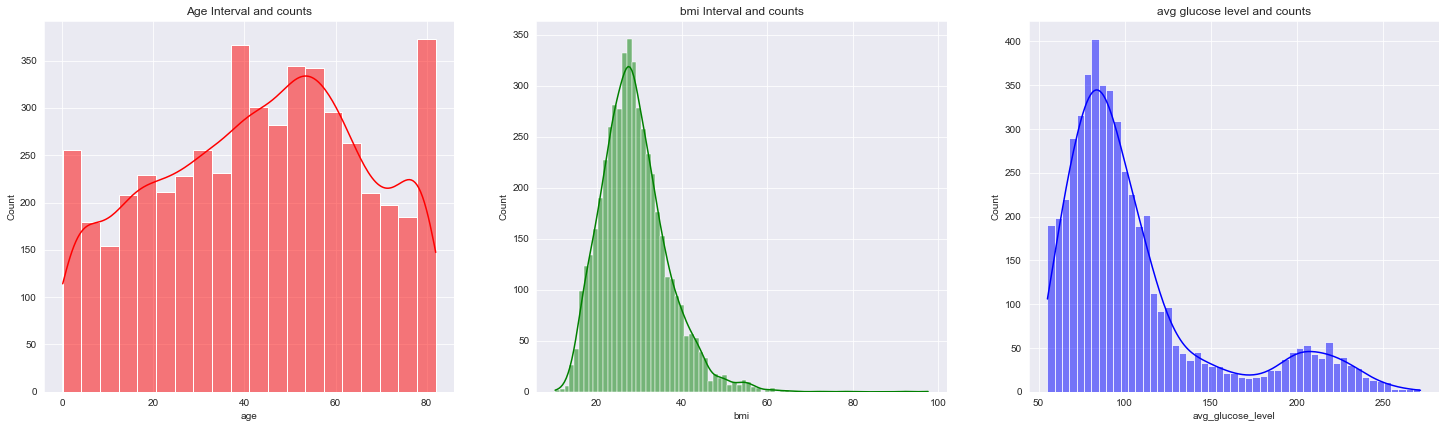

In [12]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(df['age'],color='red',kde=True).set_title('Age Interval and counts')

plt.subplot(2,3,2)
sns.histplot(df['bmi'],color='green',kde=True).set_title('bmi Interval and counts')

plt.subplot(2,3,3)
sns.histplot(df['avg_glucose_level'],kde=True,color='blue').set_title('avg glucose level and counts')

plt.show()

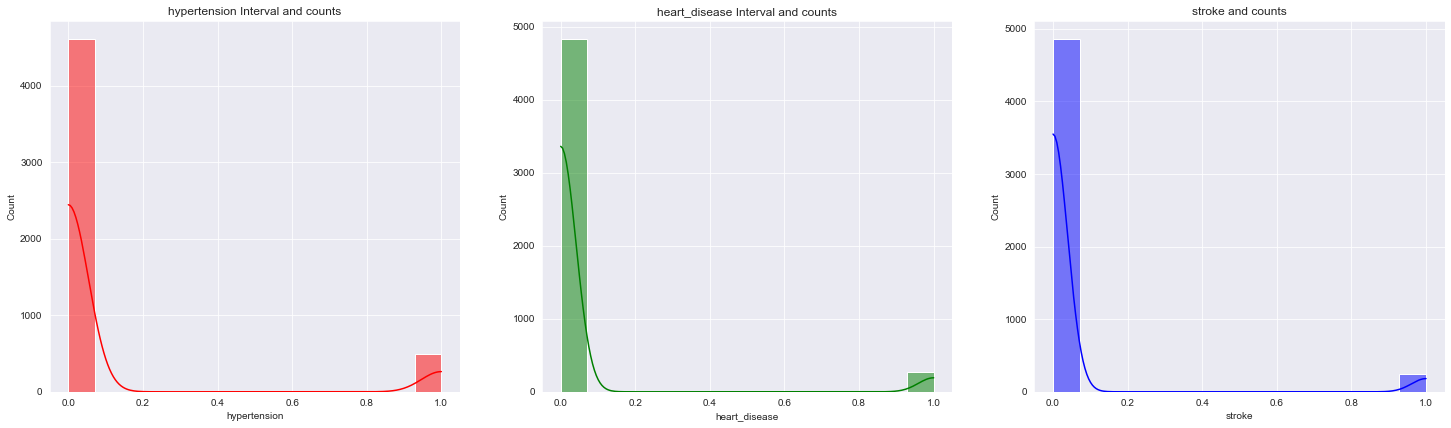

In [13]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(df['hypertension'],color='red',kde=True).set_title('hypertension Interval and counts')

plt.subplot(2,3,2)
sns.histplot(df['heart_disease'],color='green',kde=True).set_title('heart_disease Interval and counts')

plt.subplot(2,3,3)
sns.histplot(df['stroke'],kde=True,color='blue').set_title('stroke and counts')

plt.show()

In [14]:
df[['gender','stroke']].groupby(['gender'],as_index=False).mean().sort_values(by='stroke',ascending=False)

,gender,stroke
1,Male,0.051064
0,Female,0.047094
2,Other,0.000000


Text(0.5, 1.0, 'Distribution of samples by gender')

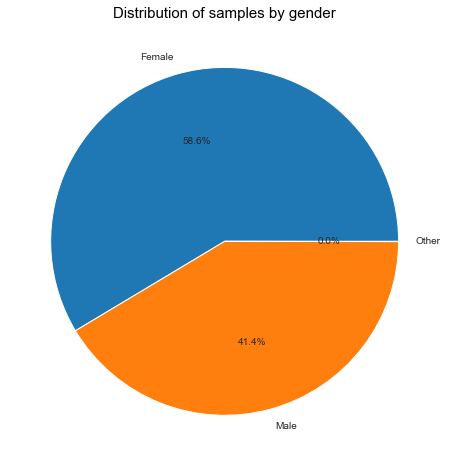

In [15]:
labels=df['gender'].value_counts().index
values=df['gender'].value_counts().values

plt.figure(figsize=(8,8))
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('Distribution of samples by gender',color='black',fontsize=15)

In [16]:
df[['ever_married','stroke']].groupby(['ever_married'],as_index=False).count().sort_values(by='stroke',ascending=False)

,ever_married,stroke
1,Yes,3353
0,No,1757


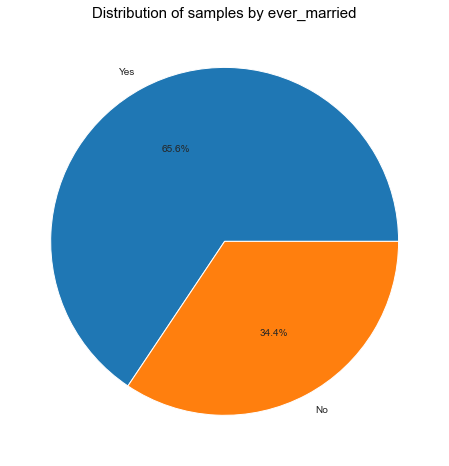

In [17]:
values=df['ever_married'].value_counts().values
labels=df['ever_married'].value_counts().index

plt.figure(figsize=(8,8))
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('Distribution of samples by ever_married',color='black',fontsize=15)
plt.show()

In [18]:
df[['work_type','stroke']].groupby(['work_type'],as_index=False).count().sort_values(by='stroke',ascending=False)

,work_type,stroke
2,Private,2925
3,Self-employed,819
4,children,687
0,Govt_job,657
1,Never_worked,22


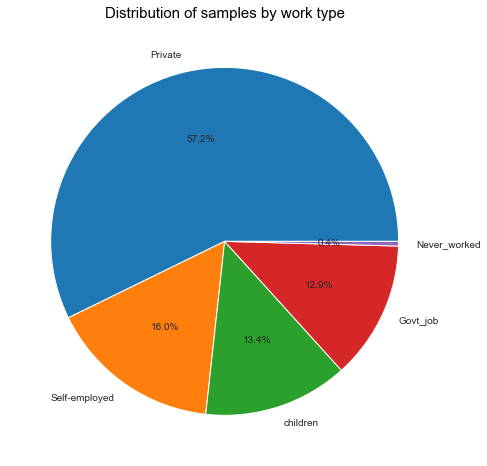

In [19]:
values=df['work_type'].value_counts().values
labels=df['work_type'].value_counts().index

plt.figure(figsize=(8,8))
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('Distribution of samples by work type',color='black',fontsize=15)
plt.show()

In [20]:
df[['Residence_type','stroke']].groupby(['Residence_type'],as_index=False).count().sort_values(by='stroke',ascending=False)

,Residence_type,stroke
1,Urban,2596
0,Rural,2514


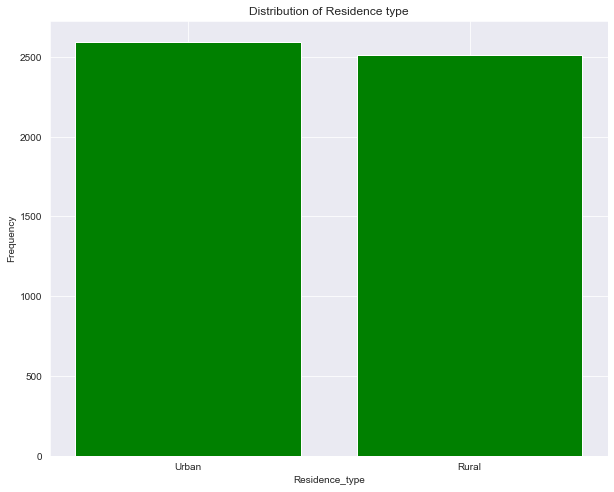

In [21]:
plt.figure(figsize=(10,8))
plt.bar(df['Residence_type'].value_counts().index,df['Residence_type'].value_counts().values,color='green')
plt.xlabel('Residence_type')
plt.ylabel('Frequency')
plt.title('Distribution of Residence type')
plt.show()

In [22]:
df[['smoking_status','stroke']].groupby(['smoking_status'],as_index=False).mean().sort_values(by='stroke',ascending=False)

,smoking_status,stroke
1,formerly smoked,0.079096
3,smokes,0.053232
2,never smoked,0.047569
0,Unknown,0.030440


In [23]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

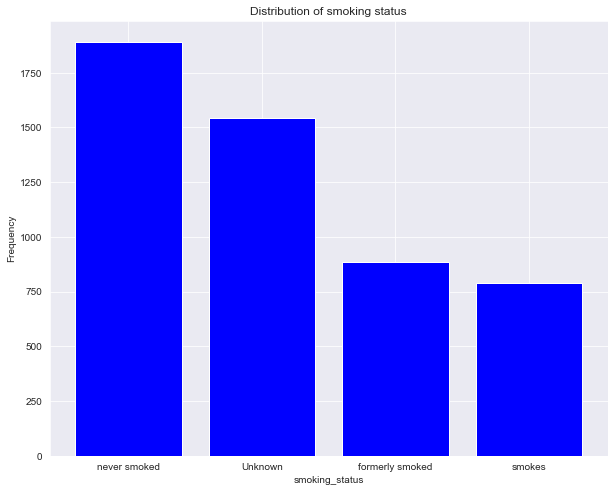

In [24]:
plt.figure(figsize=(10,8))
plt.bar(df['smoking_status'].value_counts().index,df['smoking_status'].value_counts().values,color='blue')
plt.xlabel('smoking_status')
plt.ylabel('Frequency')
plt.title('Distribution of smoking status')
plt.show()

In [25]:
#Pandas Profiling

#import pandas_profiling as pp

In [26]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas_profiling as pp

In [28]:
pp.ProfileReport(df)

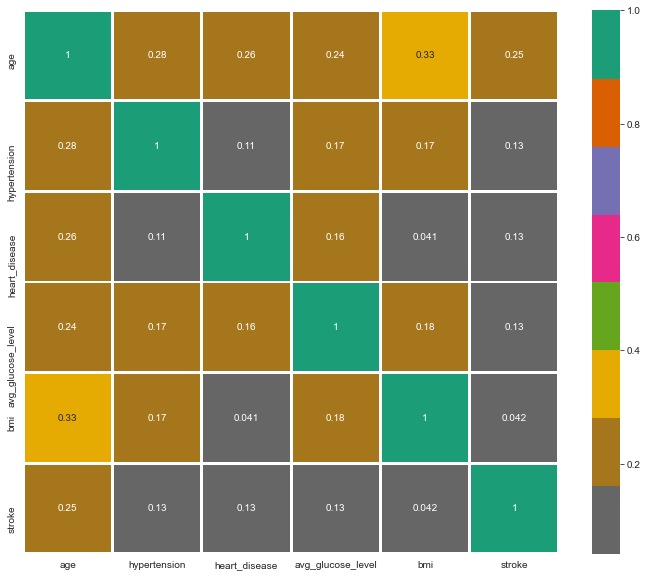

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='Dark2_r',annot=True,linewidths=2)
plt.show()

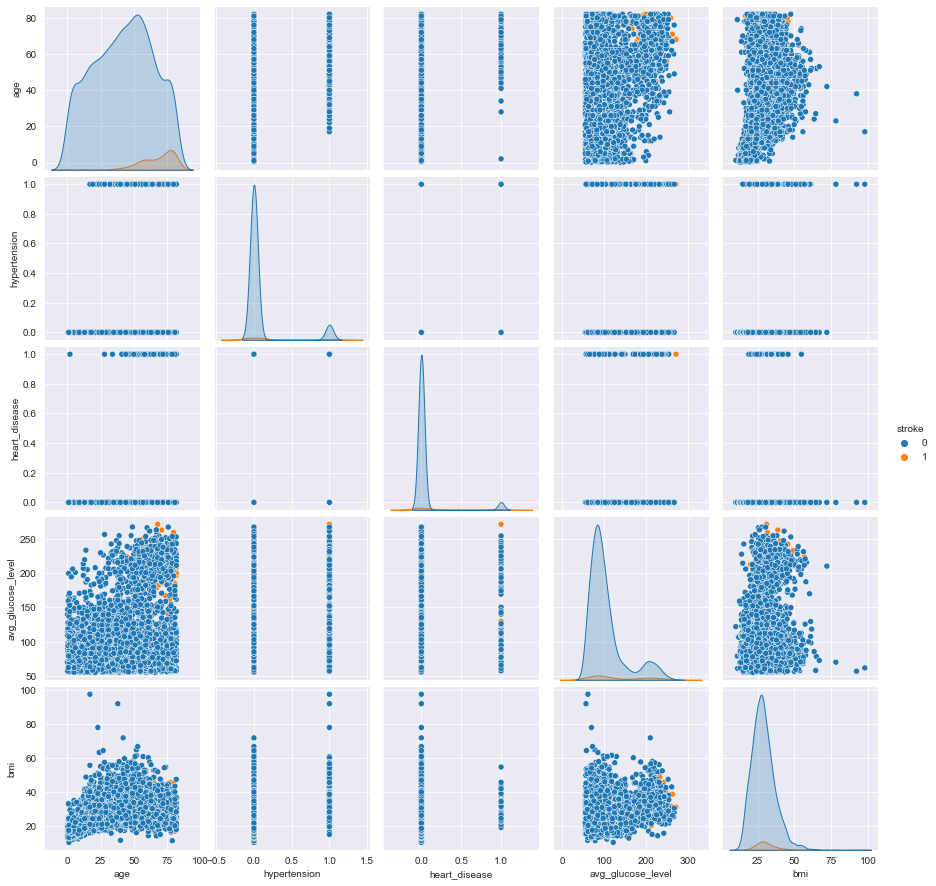

In [32]:
sns.pairplot(df,hue='stroke')

In [42]:
#Finding the missing values

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

DT_bmi_pipe=Pipeline(steps=[('scale',StandardScaler()),('lr',DecisionTreeRegressor(random_state=42))])

X=df[['age','gender','bmi']].copy()
X.gender=X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
missing=X[X.bmi.isna()]
X=X[~X.bmi.isna()]
Y=X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi=pd.Series(DT_bmi_pipe.predict(missing[['age','gender']]),index=missing.index)
df.loc[missing.index,'bmi']=predicted_bmi

In [44]:
Y

0       36.6
2       32.5
3       34.4
4       24.0
5       29.0
        ... 
5104    18.6
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 4909, dtype: float64

In [45]:
X

,age,gender
0,67.0,0
2,80.0,0
3,49.0,1
4,79.0,1
5,81.0,0
...,...,...
5104,13.0,1
5106,81.0,1
5107,35.0,1
5108,51.0,0


In [49]:
predicted_bmi

1       29.879487
8       30.556098
13      27.247222
19      30.841860
27      33.146667
          ...    
5039    32.716000
5048    28.313636
5093    31.459322
5099    28.313636
5105    28.476923
Length: 201, dtype: float64

In [50]:
#Mapping

df['gender']=df.gender.map({'Male':0,'Female':1,'Other':2})
df['smoking_status']=df.smoking_status.map({'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3})
df['Residence_type']=df.Residence_type.map({'Urban':0,'Rural':1})
df['work_type']=df.work_type.map({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})
df['ever_married']=df.ever_married.map({'Yes':0,'No':1})

In [66]:
#train_test_split

x=df.drop('stroke',axis=1)
y=df['stroke']

In [67]:
x.shape

(5110, 10)

In [68]:
y.shape

(5110,)

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [71]:
x_train.shape

(3577, 10)

In [72]:
y_train.shape

(3577,)

In [73]:
y_train.value_counts()

0    3417
1     160
Name: stroke, dtype: int64

In [74]:
sm=SMOTE(random_state=42)
x_train,y_train=sm.fit_resample(x_train,y_train)

In [75]:
x_train.shape

(6834, 10)

In [76]:
y_train.shape

(6834,)

In [77]:
y_train.value_counts()

1    3417
0    3417
Name: stroke, dtype: int64

In [80]:
#models
dt_pipe=Pipeline(steps=[('scale',StandardScaler()),('DT',DecisionTreeClassifier(random_state=42))])
rf_pipe=Pipeline(steps=[('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
lr_pipe=Pipeline(steps=[('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])
svm_pipe=Pipeline(steps=[('scale',StandardScaler()),('sv',SVC(random_state=42))])
knn_pipe=Pipeline(steps=[('scale',StandardScaler()),('knn',KNeighborsClassifier())])
gb_pipe=Pipeline(steps=[('scale',StandardScaler()),('gb',GaussianNB())])

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report

In [85]:
#crossval score
dt_cross_val=cross_val_score(dt_pipe,x_train,y_train,cv=10,scoring='f1')
rf_cross_val=cross_val_score(rf_pipe,x_train,y_train,cv=10,scoring='f1')
lr_cross_val=cross_val_score(lr_pipe,x_train,y_train,cv=10,scoring='f1')
svm_cross_val=cross_val_score(svm_pipe,x_train,y_train,cv=10,scoring='f1')
knn_cross_val=cross_val_score(knn_pipe,x_train,y_train,cv=10,scoring='f1')
gb_cross_val=cross_val_score(gb_pipe,x_train,y_train,cv=10,scoring='f1')

In [88]:
print(dt_cross_val.mean())
print(rf_cross_val.mean())
print(lr_cross_val.mean())
print(svm_cross_val.mean())
print(knn_cross_val.mean())
print(gb_cross_val.mean())

0.9084366735956056
0.9441127268241283
0.8233643546742758
0.8607571045673851
0.8933976790877942
0.8218461953292895


In [89]:
dt_pipe.fit(x_train,y_train)
rf_pipe.fit(x_train,y_train)
lr_pipe.fit(x_train,y_train)
svm_pipe.fit(x_train,y_train)
knn_pipe.fit(x_train,y_train)
gb_pipe.fit(x_train,y_train)

dt_pipe_predict=dt_pipe.predict(x_test)
rf_pipe_predict=rf_pipe.predict(x_test)
lr_pipe_predict=lr_pipe.predict(x_test)
svm_pipe_predict=svm_pipe.predict(x_test)
knn_pipe_predict=knn_pipe.predict(x_test)
gb_pipe_predict=gb_pipe.predict(x_test)

dt_cm=confusion_matrix(y_test,dt_pipe_predict)
rf_cm=confusion_matrix(y_test,rf_pipe_predict)
lr_cm=confusion_matrix(y_test,lr_pipe_predict)
svm_cm=confusion_matrix(y_test,svm_pipe_predict)
knn_cm=confusion_matrix(y_test,knn_pipe_predict)
gb_cm=confusion_matrix(y_test,gb_pipe_predict)

dt_f1=f1_score(y_test,dt_pipe_predict)
rf_f1=f1_score(y_test,rf_pipe_predict)
lr_f1=f1_score(y_test,lr_pipe_predict)
svm_f1=f1_score(y_test,svm_pipe_predict)
knn_f1=f1_score(y_test,knn_pipe_predict)
gb_f1=f1_score(y_test,gb_pipe_predict)

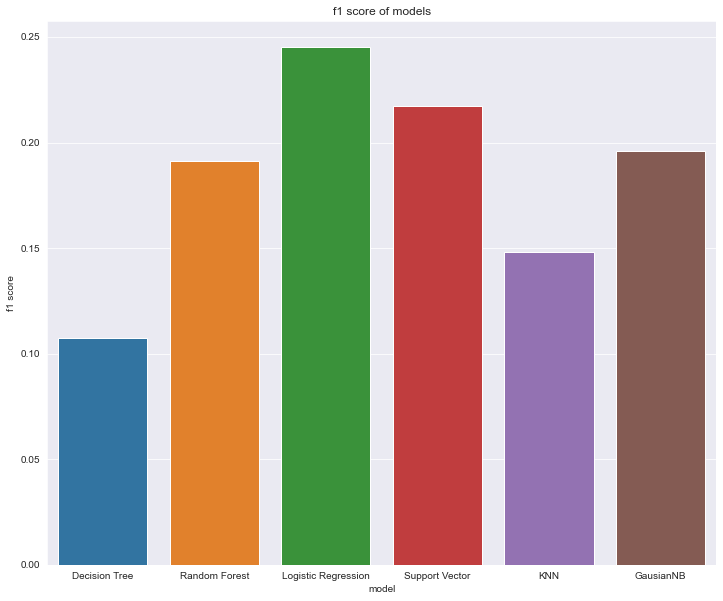

In [93]:
plt.figure(figsize=(12,10))
sns.barplot(x=['Decision Tree','Random Forest','Logistic Regression','Support Vector','KNN','GausianNB'],
            y=[dt_f1,rf_f1,lr_f1,svm_f1,knn_f1,gb_f1])
plt.xlabel('model')
plt.ylabel('f1 score')
plt.title('f1 score of models')
plt.show()

In [95]:
print('dt f1 score:',dt_f1)
print('rf f1 score:',rf_f1)
print('lr f1 score:',lr_f1)
print('svm f1 score:',svm_f1)
print('knn f1 score:',knn_f1)
print('gb f1 score:',gb_f1)

dt f1 score: 0.10743801652892562
rf f1 score: 0.1910112359550562
lr f1 score: 0.2451923076923077
svm f1 score: 0.2171428571428571
knn f1 score: 0.14814814814814814
gb f1 score: 0.19595645412130638


In [97]:
print('Accuracy score of dt:',accuracy_score(y_test,dt_pipe_predict))
print('Classification Report:')
print(classification_report(y_test,dt_pipe_predict))

Accuracy score of dt: 0.8590998043052838
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1444
           1       0.08      0.15      0.11        89

    accuracy                           0.86      1533
   macro avg       0.51      0.52      0.52      1533
weighted avg       0.90      0.86      0.88      1533



In [98]:
print('Accuracy score of rf:',accuracy_score(y_test,rf_pipe_predict))
print('Classification Report:')
print(classification_report(y_test,rf_pipe_predict))

Accuracy score of rf: 0.9060665362035225
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.19      0.19      0.19        89

    accuracy                           0.91      1533
   macro avg       0.57      0.57      0.57      1533
weighted avg       0.91      0.91      0.91      1533



In [99]:
print('Accuracy score of lr:',accuracy_score(y_test,lr_pipe_predict))
print('Classification Report:')
print(classification_report(y_test,lr_pipe_predict))

Accuracy score of lr: 0.7951728636660144
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1444
           1       0.16      0.57      0.25        89

    accuracy                           0.80      1533
   macro avg       0.56      0.69      0.56      1533
weighted avg       0.92      0.80      0.84      1533



In [100]:
print('Accuracy score of svm:',accuracy_score(y_test,svm_pipe_predict))
print('Classification Report:')
print(classification_report(y_test,svm_pipe_predict))

Accuracy score of svm: 0.8212654924983692
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1444
           1       0.15      0.43      0.22        89

    accuracy                           0.82      1533
   macro avg       0.55      0.64      0.56      1533
weighted avg       0.91      0.82      0.86      1533



In [101]:
print('Accuracy score of knn:',accuracy_score(y_test,knn_pipe_predict))
print('Classification Report:')
print(classification_report(y_test,knn_pipe_predict))

Accuracy score of knn: 0.8049575994781474
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1444
           1       0.10      0.29      0.15        89

    accuracy                           0.80      1533
   macro avg       0.52      0.56      0.52      1533
weighted avg       0.90      0.80      0.85      1533



In [102]:
print('Accuracy score of gb:',accuracy_score(y_test,gb_pipe_predict))
print('Classification Report:')
print(classification_report(y_test,gb_pipe_predict))

Accuracy score of gb: 0.6627527723418134
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79      1444
           1       0.11      0.71      0.20        89

    accuracy                           0.66      1533
   macro avg       0.54      0.68      0.49      1533
weighted avg       0.92      0.66      0.75      1533

